In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
amazon = pd.read_excel("datasets\Book_products.xlsx", sheet_name=0)
barnes = pd.read_excel("datasets\Book_products.xlsx", sheet_name=1)
ebay = pd.read_excel("datasets\Book_products.xlsx", sheet_name=2)

In [14]:
amazon = amazon.dropna()
amazon = amazon.astype({"Book Name":"string"})
amazon = amazon.astype({"Author":"string"})
amazon = amazon.reset_index()
amazon.iat[15, 4] = 0; amazon.iat[33, 4] = 0; amazon.iat[52, 4] = 0
amazon = amazon.astype({"Customers_Rated":"int64"})

# Loops through Rating column to grab rating
for index in range(amazon["Rating"].shape[0]):
    amazon.iat[index, 5] = str(amazon.iat[index, 5])[:3]
    
amazon["Rating"] = amazon["Rating"].apply(pd.to_numeric, errors='coerce')

In [15]:
barnes = barnes.astype({"Book Name":"string"})

In [16]:
ebay = ebay[ebay["price_new"].notna()]

for index in range(ebay["Rating"].shape[0]):
    if str(ebay.iat[index, 6]).__eq__("No "):
        ebay.iat[index, 6] = 0

ebay = ebay.astype({"Rating":"float64"})

In [17]:
pd_amazon = pd.pivot_table(amazon, index="Book Name", values=["Price", "Rating"]).sort_values("Price", ascending=False)
display(pd_amazon.head(3))

pd_barnes = pd.pivot_table(barnes, index="Book Name", values="Price").sort_values("Price", ascending=False)
display(pd_barnes.head(3))

pd_ebay = pd.pivot_table(ebay, index="Book Name", values=["price_new", "Rating"]).sort_values("price_new", ascending=False)
display(pd_ebay.head(3))

,Price,Rating
Book Name,,
Harry Potter Paperback Box Set (Books 1-7),34.68,4.9
Just Tyrus: A Memoir,32.49,4.7
Berserk Deluxe Volume 1,29.99,4.9


,Price
Book Name,
Our Journey Together,67.49
What's for Dessert: Simple Recipes for Dessert...,37.50
Fifty Shades Freed 10th Anniversary Edition,31.99


,Rating,price_new
Book Name,,
The Witcher Boxed Set,4.4,77.12
"Shatter Me Ser.: Shatter Me Series 6-Book Box Set : Shatter Me, Unravel Me, Ignite Me, Restore Me, Defy Me, Imagine Me",0.0,48.49
75 Hard : A Tactical Guide to Winning the War with Yourself,0.0,46.99


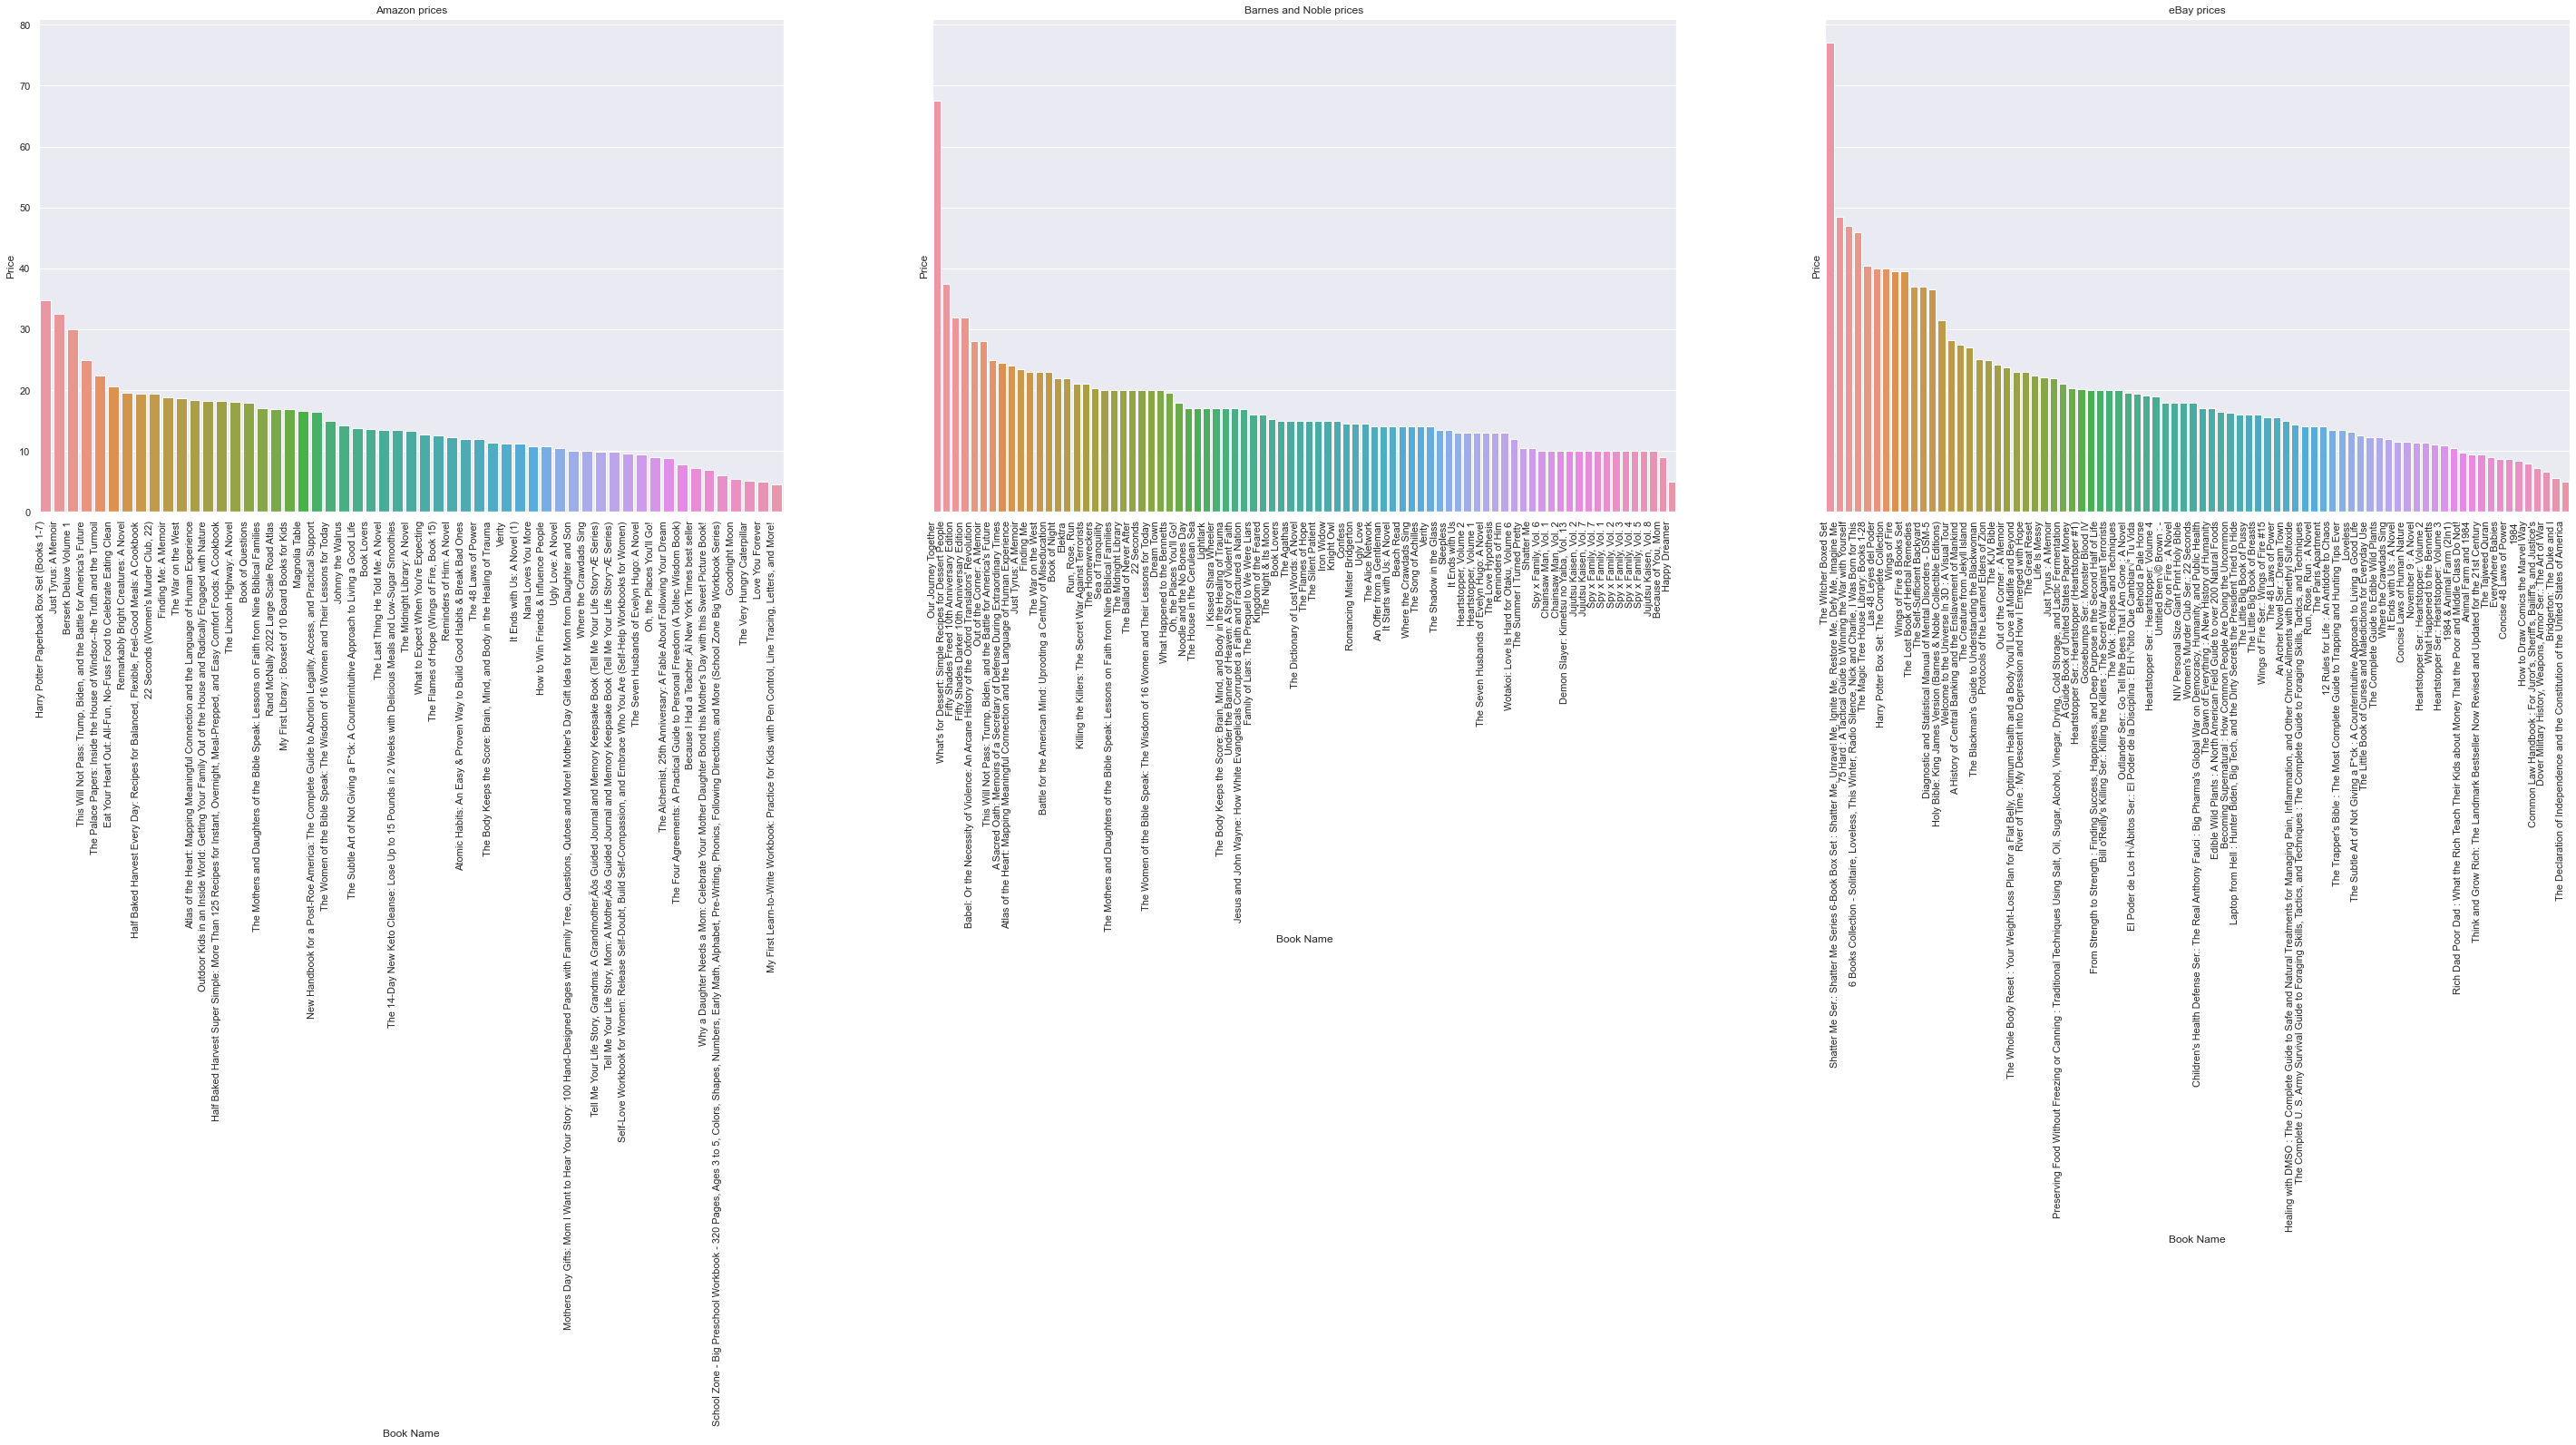

In [18]:
sns.set()
f, ax = plt.subplots(ncols=3, figsize=(50, 10), sharey=True)

graph1 = sns.barplot(x=pd_amazon.index, y="Price", data=pd_amazon, ax=ax[0])
graph1.set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha="right")
graph1.set_title("Amazon prices")

graph2 = sns.barplot(x=pd_barnes.index, y="Price", data=pd_barnes, ax=ax[1])
graph2.set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha="right")
graph2.set_title("Barnes and Noble prices")

graph3 = sns.barplot(x=pd_ebay.index, y="price_new", data=pd_ebay, ax=ax[2])
graph3.set_xticklabels(ax[2].get_xticklabels(), rotation=90, ha="right")
graph3.set_ylabel("Price")
graph3.set_title("eBay prices")

plt.show()

In [19]:
display(pd_amazon.nlargest(1, "Price"))

display(pd_barnes.nlargest(1, "Price"))

display(pd_ebay.nlargest(1, "price_new"))

,Price,Rating
Book Name,,
Harry Potter Paperback Box Set (Books 1-7),34.68,4.9


,Price
Book Name,
Our Journey Together,67.49


,Rating,price_new
Book Name,,
The Witcher Boxed Set,4.4,77.12


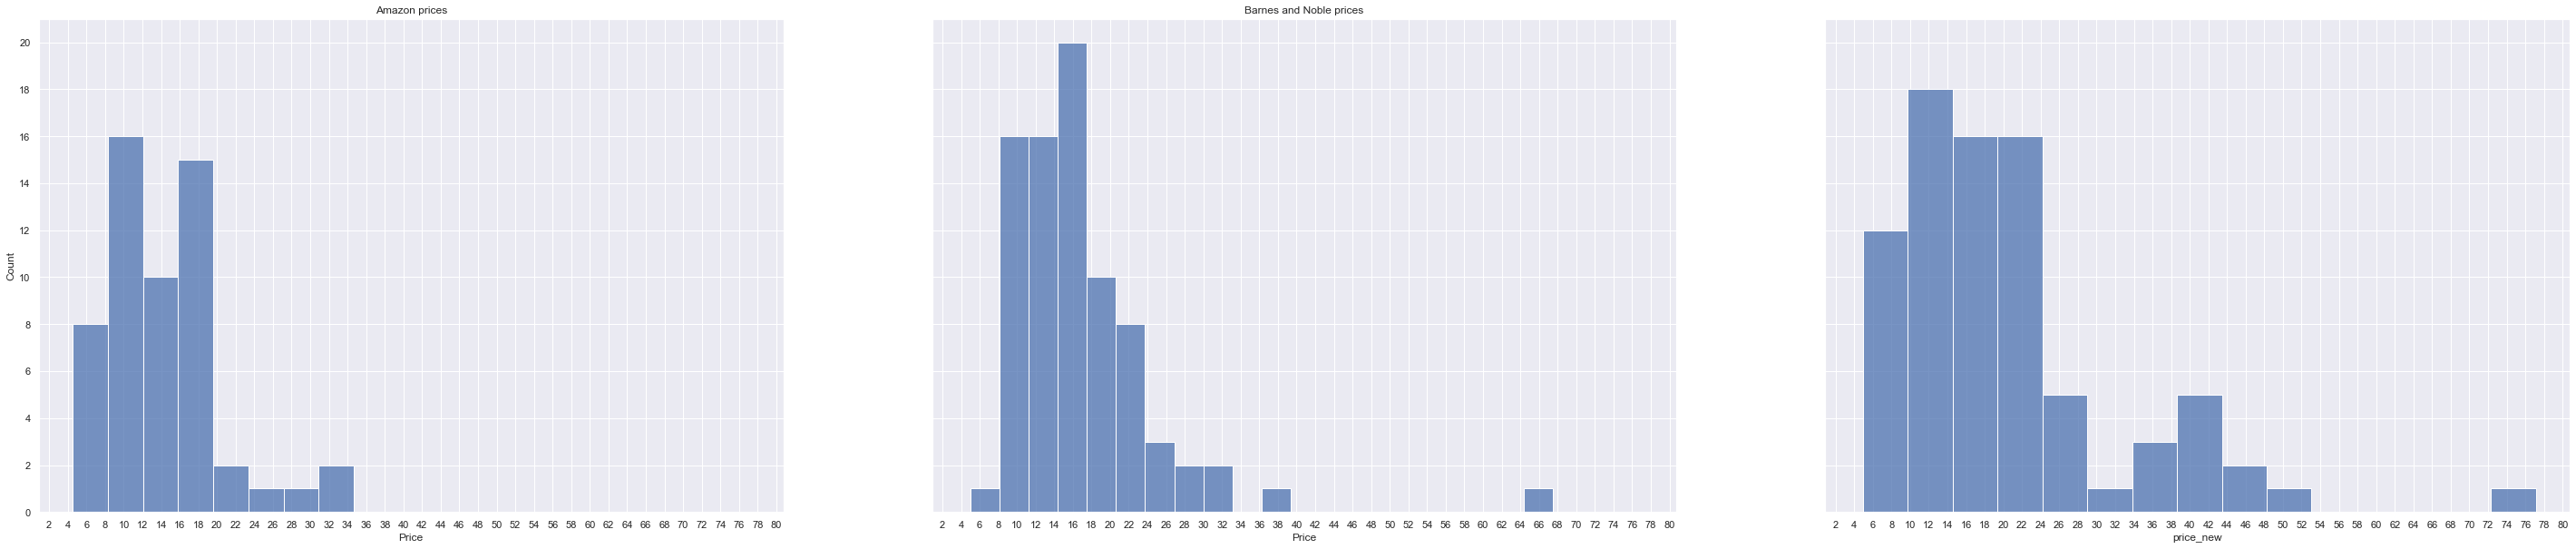

In [20]:
f, ax = plt.subplots(ncols=3, figsize=(50, 10), sharey=True, sharex=True)
plt.xticks(range(0,81,2))
plt.yticks(range(0,21,2))
plt.minorticks_on

graph1 = sns.histplot(pd_amazon["Price"], ax=ax[0])
graph1.set_title("Amazon prices")

graph2 = sns.histplot(pd_barnes["Price"], ax=ax[1])
graph2.set_title("Barnes and Noble prices")

grahp3 = sns.histplot(pd_ebay["price_new"], ax=ax[2])
graph3.set_title("eBay prices")

plt.show()

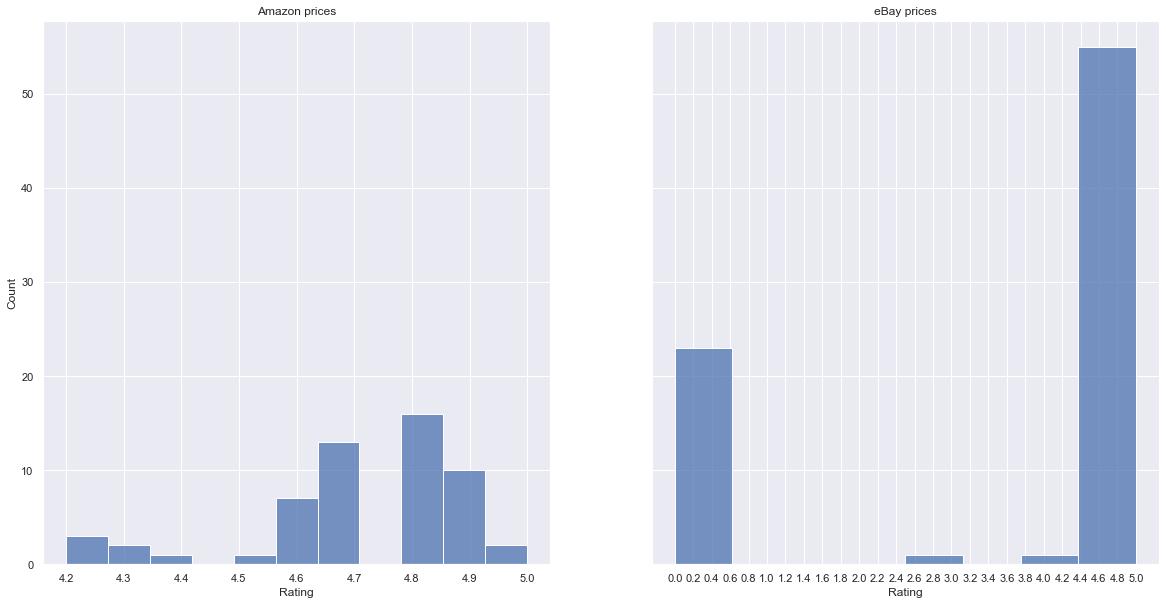

In [21]:
f, ax = plt.subplots(ncols=2, figsize=(20, 10), sharey=True)
plt.xticks(np.arange(0,5.2,0.2))

graph1 = sns.histplot(pd_amazon["Rating"], ax=ax[0])
graph1.set_title("Amazon prices")

graph2 = sns.histplot(pd_ebay["Rating"], ax=ax[1])
graph2.set_title("eBay prices")

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'get_xticklabels'

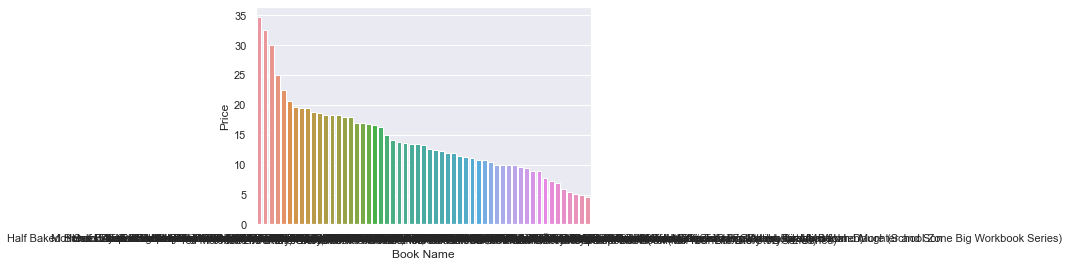

In [22]:
graph1 = sns.barplot(x=pd_amazon.index, y="Price", data=pd_amazon)
graph1.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
graph1.set_title("Amazon prices")